In [89]:
import numpy as np
import pandas as pd
import plotly.express as px 
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:

df_raw = pd.read_csv("netflix.csv")
df_raw.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Summary of the DataSet

In [3]:
df_raw.shape

(8807, 12)

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### No. of Null Values

In [5]:
df_raw.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

 So columns containing null values are,
 * director
 * cast
 * country
 * date_added
 * rating
 * duration


In [6]:
df_raw['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

So, the dataset contains two types of products. Movies and Tv Shows.

# Genre Analysis

Let's analyze different genres first

In [7]:
df_genre = df_raw[['show_id','type','country', 'release_year', 'duration', 'listed_in']]
df_genre.head()

,show_id,type,country,release_year,duration,listed_in
0,s1,Movie,United States,2020,90 min,Documentaries
1,s2,TV Show,South Africa,2021,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,NaN,2021,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,NaN,2021,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,India,2021,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [8]:
df_genre['listed_in'].unique()

array(['Documentaries', 'International TV Shows, TV Dramas, TV Mysteries',
       'Crime TV Shows, International TV Shows, TV Action & Adventure',
       'Docuseries, Reality TV',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'TV Dramas, TV Horror, TV Mysteries', 'Children & Family Movies',
       'Dramas, Independent Movies, International Movies',
       'British TV Shows, Reality TV', 'Comedies, Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Dramas, International Movies',
       'Children & Family Movies, Comedies',
       'British TV Shows, Crime TV Shows, Docuseries',
       'TV Comedies, TV Dramas', 'Documentaries, International Movies',
       'Crime TV Shows, Spanish-Language TV Shows, TV Dramas',
       'Thrillers',
       'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure',
       'International TV Shows, TV Action & Adventure, TV Dramas',
       'Comedies, International Movies',
       'Comedies, 

So, let's visualize the popular genres for both types of productions

In [71]:
genres_lst=list(df_genre['listed_in'])
gen=[]

for genre in genres_lst:
    genre=list(genre.split(','))
    for j in genre:
        gen.append(j.replace(' ',""))

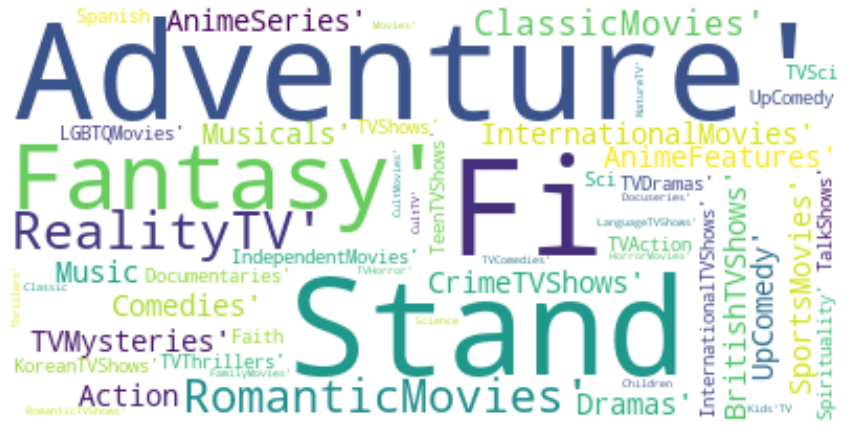

In [78]:
text = list(set(gen))
plt.rcParams['figure.figsize'] = (15, 12)

wordcloud = WordCloud(max_words=1000000,background_color="white").generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

### Movies 

In [80]:
movies = df_genre.loc[df_genre['type'] == 'Movie']

In [81]:
def genre_word(df):
    genres_lst=list(df['listed_in'])
    gen=[]

    for genre in genres_lst:
        genre=list(genre.split(','))
        for j in genre:
            gen.append(j.replace(' ',""))

    text = list(set(gen))
    plt.rcParams['figure.figsize'] = (15, 12)

    wordcloud = WordCloud(max_words=1000000,background_color="white").generate(str(text))

    plt.imshow(wordcloud,interpolation="bilinear")
    plt.axis("off")
    plt.show()

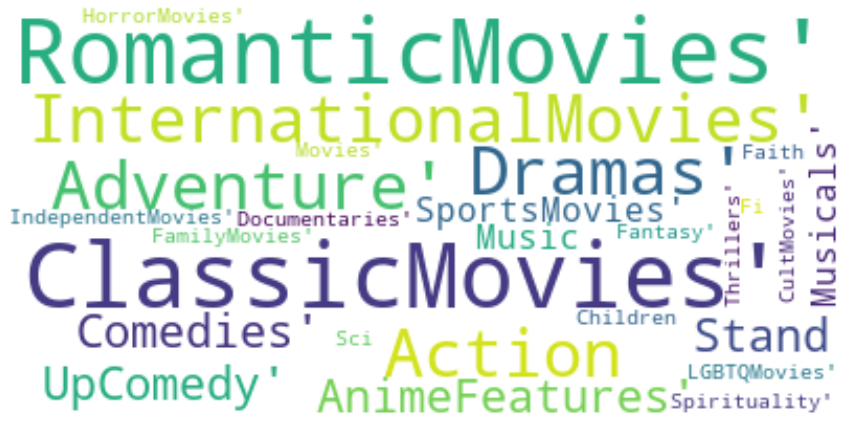

In [84]:
genre_word(movies)

### TV Shows
Similarly for TV Shows...

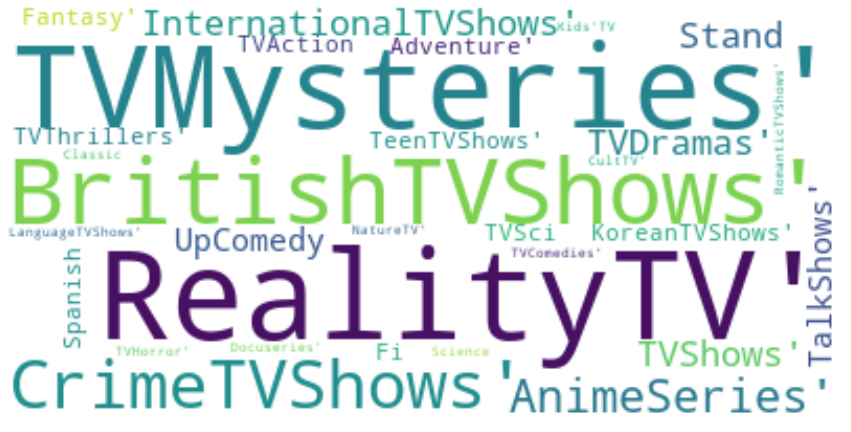

In [85]:
shows = df_genre.loc[df_genre['type'] == 'TV Show']
genre_word(shows)

## <b>Main Genres</b>

Now, we want in a form so that each genre gets each cell in the dataframe. Then it would be easier to visualize te frequency

In [9]:
genre_lst = df_genre['listed_in'].apply(lambda x: str(x).split(", ")).tolist()
genre_lst

[['Documentaries'],
 ['International TV Shows', 'TV Dramas', 'TV Mysteries'],
 ['Crime TV Shows', 'International TV Shows', 'TV Action & Adventure'],
 ['Docuseries', 'Reality TV'],
 ['International TV Shows', 'Romantic TV Shows', 'TV Comedies'],
 ['TV Dramas', 'TV Horror', 'TV Mysteries'],
 ['Children & Family Movies'],
 ['Dramas', 'Independent Movies', 'International Movies'],
 ['British TV Shows', 'Reality TV'],
 ['Comedies', 'Dramas'],
 ['Crime TV Shows', 'Docuseries', 'International TV Shows'],
 ['Crime TV Shows', 'International TV Shows', 'TV Action & Adventure'],
 ['Dramas', 'International Movies'],
 ['Children & Family Movies', 'Comedies'],
 ['British TV Shows', 'Crime TV Shows', 'Docuseries'],
 ['TV Comedies', 'TV Dramas'],
 ['Documentaries', 'International Movies'],
 ['Crime TV Shows', 'Spanish-Language TV Shows', 'TV Dramas'],
 ['Thrillers'],
 ['International TV Shows',
  'Spanish-Language TV Shows',
  'TV Action & Adventure'],
 ['Crime TV Shows', 'Docuseries', 'International

Thus this list contains basically all the genres of all the shows and movies. The inner brackets contain the genre of individual shows and movies.<br>
If we now make a dataframe out of this list of lists. Then the elements of the inner lists will get placed in different columns.

In [10]:
df_genre_melted = pd.DataFrame(genre_lst,index = df_genre['show_id'])
df_genre_melted

,0,1,2
show_id,,,
s1,Documentaries,None,None
s2,International TV Shows,TV Dramas,TV Mysteries
s3,Crime TV Shows,International TV Shows,TV Action & Adventure
s4,Docuseries,Reality TV,None
s5,International TV Shows,Romantic TV Shows,TV Comedies
...,...,...,...
s8803,Cult Movies,Dramas,Thrillers
s8804,Kids' TV,Korean TV Shows,TV Comedies
s8805,Comedies,Horror Movies,None


## stacking :
As we have multiple columns for a single index vaalue ie. a show id here. We are going to melt the dataframe so that we can create a single column dataframe with all the data of 3 columns get stacked one over another. Naturally the dataframe will contain a multi-level index column also.

In [11]:
df_genre_new = pd.DataFrame(df_genre_melted.stack()).reset_index()
df_genre_new

,show_id,level_1,0
0,s1,0,Documentaries
1,s2,0,International TV Shows
2,s2,1,TV Dramas
3,s2,2,TV Mysteries
4,s3,0,Crime TV Shows
...,...,...,...
19318,s8806,0,Children & Family Movies
19319,s8806,1,Comedies
19320,s8807,0,Dramas
19321,s8807,1,International Movies


Here level_1 column gets created due to stacking, but we dont need it so lets drop it. And also the column0 is basically the required genres column.

In [12]:
df_genre_new.rename(columns={0:'genre'}, inplace=True)
df_genre_new.drop(['level_1'], axis=1, inplace=True)


In [13]:
df_genre_new.head()

,show_id,genre
0,s1,Documentaries
1,s2,International TV Shows
2,s2,TV Dramas
3,s2,TV Mysteries
4,s3,Crime TV Shows


In [14]:
df_genre_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19323 entries, 0 to 19322
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   show_id  19323 non-null  object
 1   genre    19323 non-null  object
dtypes: object(2)
memory usage: 302.0+ KB


To get an idea about all the genres, lets create a csv file so that we can inspect it in MS Excel.

In [15]:
#df_genre_new.to_csv('df_genre_new.csv')

Now, for example TV Dramas and Dramas are no different genres. So, lets try to filter the genre section a bit before try to visualize the it 

In [16]:
df_genre_new['genre'].unique()

array(['Documentaries', 'International TV Shows', 'TV Dramas',
       'TV Mysteries', 'Crime TV Shows', 'TV Action & Adventure',
       'Docuseries', 'Reality TV', 'Romantic TV Shows', 'TV Comedies',
       'TV Horror', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'British TV Shows',
       'Comedies', 'Spanish-Language TV Shows', 'Thrillers',
       'Romantic Movies', 'Music & Musicals', 'Horror Movies',
       'Sci-Fi & Fantasy', 'TV Thrillers', "Kids' TV",
       'Action & Adventure', 'TV Sci-Fi & Fantasy', 'Classic Movies',
       'Anime Features', 'Sports Movies', 'Anime Series',
       'Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows',
       'Cult Movies', 'TV Shows', 'Faith & Spirituality', 'LGBTQ Movies',
       'Stand-Up Comedy', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV'], dtype=object)

### Let's focus on few of the main Genres

The movies listed under to_remove list, are not particularly of any genre. So, we are going to remove these specific rows for now.

In [68]:
to_keep = ['Mysteries','Action','Anime','Dramas','Comedies','Sci-Fi','Crime','Thrillers','Reality',"Kids'",'Documentaries','Docuseries','Family','Horror','Romantic', 'Sports', 'Science','Musicals','Classic','Cult','Stand-Up']

to_remove = ['International Movies','Independent Movies','British TV Shows', 'Korean TV Shows','International TV Shows','TV Shows','Spanish-Language TV Shows','Movies','Teen TV Shows' ]

In [18]:
sum = 0
for item in to_remove:
    idx = list(df_genre_new.index[df_genre_new['genre'] == item])
    sum += len(idx)
    print(len(idx))

print(f'Total rows to be removed',sum)

2752
756
253
151
1351
16
174
57
69
Total rows to be removed 5579


So, total rows to be removed are 5579 out of total 19323, ie. almost 29 % of the data are gonna get removed which is a significant loss but to look at the genre properly, we have to do it.

In [19]:
df_genre_new.shape

(19323, 2)

In [20]:
for item in to_remove:
    idx = list(df_genre_new.index[df_genre_new['genre'] == item])
    df_genre_new.drop(idx,axis=0, inplace=True)

In [21]:
df_genre_new.shape

(13744, 2)

Thus the unwanted to_remove list elements are removed successfully.

In [22]:
for item in df_genre_new['genre']:
    word_lst = item.split(' ')
    for element in to_keep:
        if element in word_lst :
            df_genre_new['genre'][df_genre_new['genre'] == item] = element
            break

In [23]:
df_genre_new['genre'].unique()

array(['Documentaries', 'Dramas', 'Mysteries', 'Crime', 'Action',
       'Docuseries', 'Reality', 'Romantic', 'Comedies', 'Horror',
       'Family', 'Thrillers', 'Musicals', 'Sci-Fi', "Kids'", 'Classic',
       'Anime', 'Sports', 'Science', 'Cult', 'Faith & Spirituality',
       'LGBTQ Movies', 'Stand-Up'], dtype=object)

More fine tuning like Classic, Cult, Faith n spirituality, LGBTQ movies all will be under Culture n Society genre. Then 'Mysteries and Thrillers and Crime all under 'Thriller' genre. 'Documenteries' and 'Docuseries are under Documenteries genre. Kids and Family will be under a single genre.

In [24]:
df_genre_new['genre'][df_genre_new['genre'] == 'Docuseries'] = 'Documentaries'
df_genre_new['genre'][df_genre_new['genre'] == 'Mysteries'] = 'Thrillers'
df_genre_new['genre'][df_genre_new['genre'] == 'Crime'] = 'Thrillers'
df_genre_new['genre'][df_genre_new['genre'] == 'Stand-Up'] = 'Comedies'
df_genre_new['genre'][df_genre_new['genre'] == "Kids'" ] = 'Family'
df_genre_new['genre'][df_genre_new['genre'] == "Classic"] = 'Culture and Society'
df_genre_new['genre'][df_genre_new['genre'] == 'Cult' ] = 'Culture and Society'
df_genre_new['genre'][df_genre_new['genre'] == 'Faith & Spirituality'] = 'Culture and Society'
df_genre_new['genre'][df_genre_new['genre'] == 'LGBTQ Movies'] = 'Culture and Society'

In [25]:
df_genre_new['genre'].unique()

array(['Documentaries', 'Dramas', 'Thrillers', 'Action', 'Reality',
       'Romantic', 'Comedies', 'Horror', 'Family', 'Musicals', 'Sci-Fi',
       'Culture and Society', 'Anime', 'Sports', 'Science'], dtype=object)

Thus these are the final genres on which we going to focus. 

In [26]:
df_genre_new.head()

,show_id,genre
0,s1,Documentaries
2,s2,Dramas
3,s2,Thrillers
4,s3,Thrillers
6,s3,Action


As we already built a cleaned genre column so we are going to remove the unstructured 'listed in' column.

In [27]:
df_genre_new2 = df_genre.drop(['listed_in'], axis=1)
df_genre_new2.head()

,show_id,type,country,release_year,duration
0,s1,Movie,United States,2020,90 min
1,s2,TV Show,South Africa,2021,2 Seasons
2,s3,TV Show,NaN,2021,1 Season
3,s4,TV Show,NaN,2021,1 Season
4,s5,TV Show,India,2021,2 Seasons


So, now lest merge the two table 

In [28]:
df_genre_final = df_genre_new.merge(df_genre_new2, on='show_id', how='left')
df_genre_final

,show_id,genre,type,country,release_year,duration
0,s1,Documentaries,Movie,United States,2020,90 min
1,s2,Dramas,TV Show,South Africa,2021,2 Seasons
2,s2,Thrillers,TV Show,South Africa,2021,2 Seasons
3,s3,Thrillers,TV Show,NaN,2021,1 Season
4,s3,Action,TV Show,NaN,2021,1 Season
...,...,...,...,...,...,...
13739,s8805,Horror,Movie,United States,2009,88 min
13740,s8806,Family,Movie,United States,2006,88 min
13741,s8806,Comedies,Movie,United States,2006,88 min
13742,s8807,Dramas,Movie,India,2015,111 min


Thus the final dataframe is created to visualize the genre of the movies released along with other parameters like type and states and all.

Lets first simply look at the frequency of the genre column.

In [29]:
df_genre_vis = pd.DataFrame(df_genre_final.genre.value_counts())
df_genre_vis.rename(columns={'genre':'freq'}, inplace=True)
df_genre_vis.index.names=['index']
df_genre_vis['genre'] = df_genre_vis.index
df_genre_vis = df_genre_vis.sort_values('genre')
df_genre_vis

,freq,genre
index,,
Action,1027,Action
Anime,247,Anime
Comedies,2654,Comedies
Culture and Society,382,Culture and Society
Documentaries,1264,Documentaries
Dramas,3190,Dramas
Family,1092,Family
Horror,432,Horror
Musicals,375,Musicals


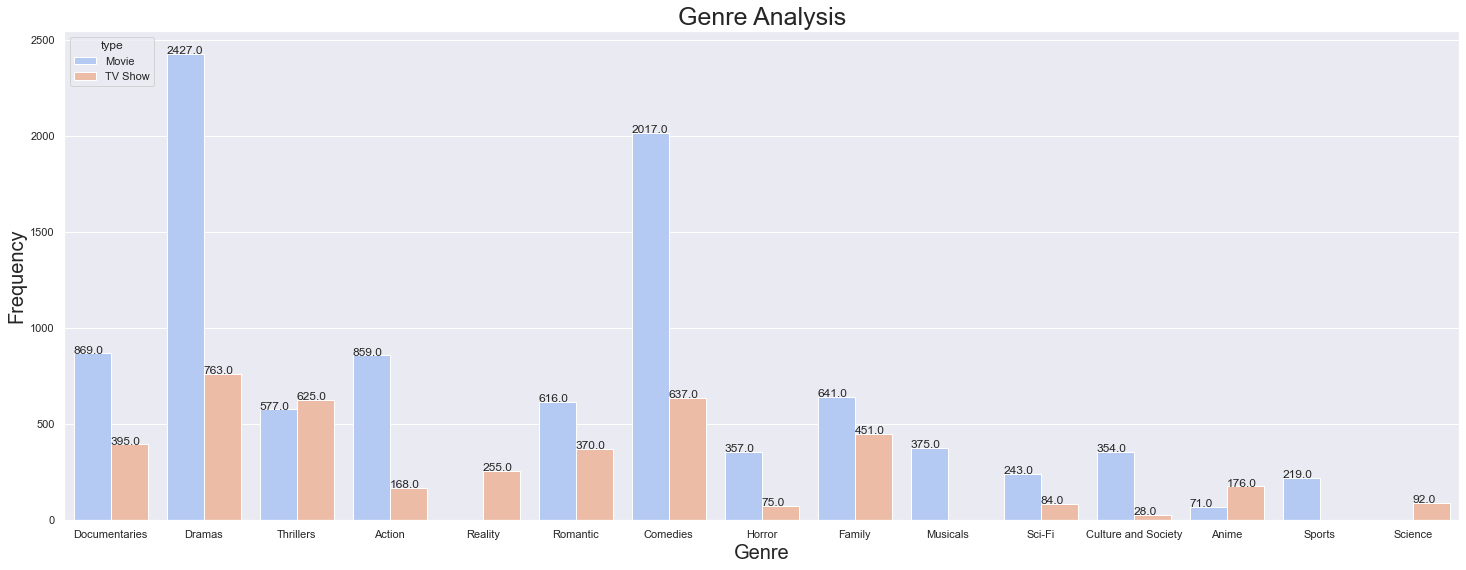

In [67]:
sns.set(font_scale = 1.2)
sns.set(rc={'figure.figsize':(25,9)})
sns.set_theme(style='darkgrid')

ax = sns.countplot(x='genre', hue='type', data=df_genre_final, palette='coolwarm')

ax.set_title('Genre Analysis', fontsize = 25)
ax.set_xlabel("Genre", fontsize=20)
ax.set_ylabel("Frequency", fontsize=20)

for p in ax.patches :
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()+0.05))

So, the amount of product released or added in Netflix depends a lot on the genre of the product. And its very clear that movies get released way more than TV Shows in Netflix while, in genral, it often seems that it's the amazing TV Shows which rise Netflix to this level where it belongs.<br> 
<p>And if we wanna see different genre counts for movies and tv shows individually, we better divide the dataset for two types of shows.

In [31]:
show_genre = df_genre_final.loc[df_genre_final['type'] == 'TV Show'].drop(['type'], axis=1).sort_values('genre')
show_genre.head()

,show_id,genre,country,release_year,duration
4200,s2629,Action,United Kingdom,2020,4 Seasons
2098,s1299,Action,South Korea,2021,1 Season
3864,s2416,Action,"United States, Mexico, Spain, Malta",2018,4 Seasons
3845,s2406,Action,United States,2020,5 Seasons
6889,s4366,Action,Canada,2018,3 Seasons


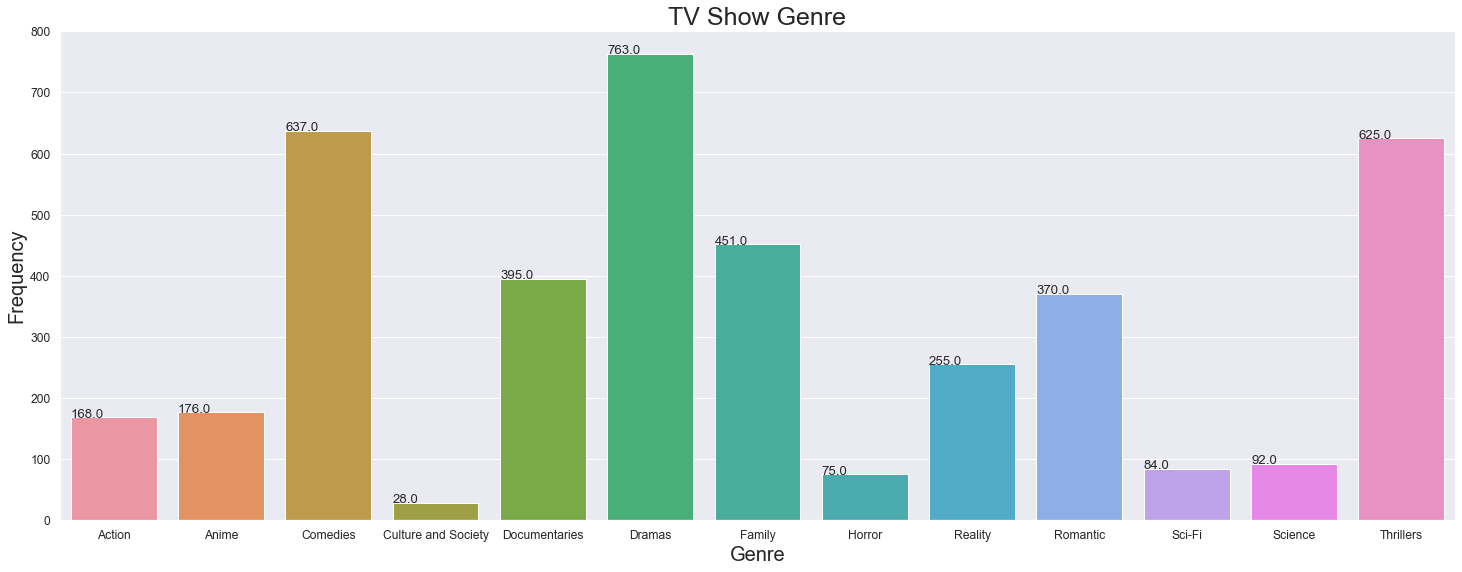

In [32]:
sns.set(font_scale = 1.1)
ax = sns.countplot(x='genre', data=show_genre)

ax.set_title('TV Show Genre', fontsize = 25)
ax.set_xlabel("Genre", fontsize=20)
ax.set_ylabel("Frequency", fontsize=20)
for p in ax.patches :
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()))

In [33]:
movie_genre = df_genre_final.loc[df_genre_final['type'] == 'Movie'].drop(['type'], axis=1).sort_values('genre')
movie_genre.head()

,show_id,genre,country,release_year,duration
7470,s4731,Action,India,2016,168 min
11014,s7072,Action,United States,1989,127 min
11017,s7073,Action,United States,1981,116 min
2251,s1397,Action,United States,2013,100 min
11020,s7074,Action,United States,1984,119 min


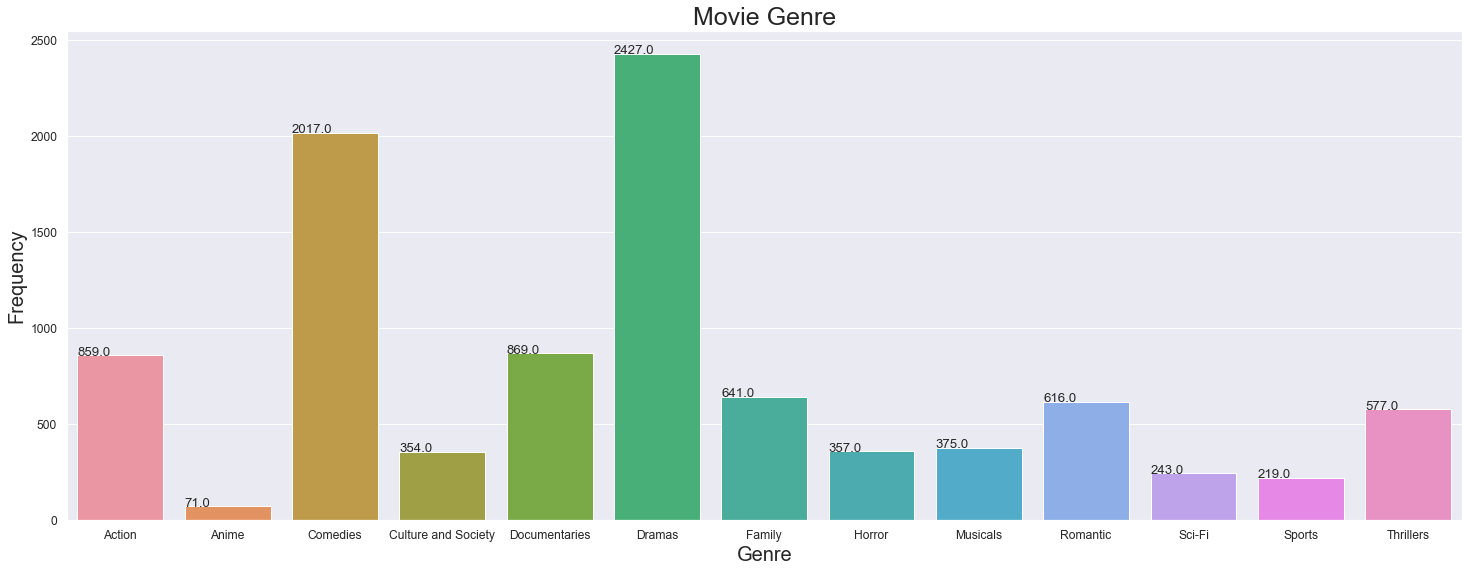

In [34]:
sns.set(font_scale = 1.1)
ax = sns.countplot(x='genre', data=movie_genre)

ax.set_title('Movie Genre', fontsize = 25)
ax.set_xlabel("Genre", fontsize=20)
ax.set_ylabel("Frequency", fontsize=20)
for p in ax.patches :
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()))

So, we can clearly see the genre differences between movies and tv shows. Like for example in thriller genre the difference is very clear. Again, for drama genre both types of products get released in an equal amount. Here the numerical values DO NOT represent the exact number of shows released as, one single show may be considered under different genre sections. So, this analysis is just to get an in depth idea how genre to genre release amount differs. Its more like a comparison rather than an exact amount of releases.

# Country Dependency

In [132]:
df_country = df_raw[['show_id','type','country']]
df_country

,show_id,type,country
0,s1,Movie,United States
1,s2,TV Show,South Africa
2,s3,TV Show,NaN
3,s4,TV Show,NaN
4,s5,TV Show,India
...,...,...,...
8802,s8803,Movie,United States
8803,s8804,TV Show,NaN
8804,s8805,Movie,United States
8805,s8806,Movie,United States


In [133]:
df_country['country'].isnull().sum()

831

In [134]:
df_country = df_country.dropna(axis=0, how='any')
df_country['country'].isnull().sum()

0

We successfully removed the rows containing null values for Country column. Now lets look how many different countries are registered in the dataset.

In [135]:
df_country.country.unique()

array(['United States', 'South Africa', 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kingdom,

In [136]:
len(df_country.country.unique())

748

But here more than one country are assigned for a single product id or show id. So, we need to unnest it first.

In [137]:
country_lst = df_country['country'].apply(lambda x: str(x).split(", ")).tolist()
country_lst

[['United States'],
 ['South Africa'],
 ['India'],
 ['United States',
  'Ghana',
  'Burkina Faso',
  'United Kingdom',
  'Germany',
  'Ethiopia'],
 ['United Kingdom'],
 ['United States'],
 ['Germany', 'Czech Republic'],
 ['United States'],
 ['Mexico'],
 ['Turkey'],
 ['India'],
 ['Australia'],
 ['United States'],
 ['United States'],
 ['United States', 'India', 'France'],
 ['United Kingdom'],
 ['Finland'],
 ['China', 'Canada', 'United States'],
 ['India'],
 ['United States'],
 ['United States'],
 ['United States'],
 ['United States'],
 ['United States'],
 ['South Africa', 'United States', 'Japan'],
 ['United States'],
 ['Nigeria'],
 ['India'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 ['United States'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 ['United Kingdom'],
 ['India'],
 ['United States'],
 ['India'],
 ['United Kingdom'],
 ['Nigeria'],
 ['Japan'],
 ['United States'],
 ['United States'],
 ['Nigeria'],
 ['Spain', 'United S

In [141]:
df_country_melted = pd.DataFrame(country_lst,index = df_country['show_id'])
df_country_melted

,0,1,2,3,4,5,6,7,8,9,10,11
show_id,,,,,,,,,,,,
s1,United States,None,None,None,None,None,None,None,None,None,None,None
s2,South Africa,None,None,None,None,None,None,None,None,None,None,None
s5,India,None,None,None,None,None,None,None,None,None,None,None
s8,United States,Ghana,Burkina Faso,United Kingdom,Germany,Ethiopia,None,None,None,None,None,None
s9,United Kingdom,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
s8802,United Arab Emirates,Jordan,None,None,None,None,None,None,None,None,None,None
s8803,United States,None,None,None,None,None,None,None,None,None,None,None
s8805,United States,None,None,None,None,None,None,None,None,None,None,None


In [142]:
df_country_new = pd.DataFrame(df_country_melted.stack()).reset_index()
df_country_new.head()

,show_id,level_1,0
0,s1,0,United States
1,s2,0,South Africa
2,s5,0,India
3,s8,0,United States
4,s8,1,Ghana


In [143]:
df_country_new.rename(columns={0:'country'}, inplace=True)
df_country_new.drop(['level_1'], axis=1, inplace=True)
df_country_new

,show_id,country
0,s1,United States
1,s2,South Africa
2,s5,India
3,s8,United States
4,s8,Ghana
...,...,...
10009,s8802,Jordan
10010,s8803,United States
10011,s8805,United States
10012,s8806,United States


Lets include the type column in this dataframe

In [178]:
df_country_final = df_country_new.merge(df_country[['show_id','type']], on='show_id', how='left')
df_country_final.head()

,show_id,country,type
0,s1,United States,Movie
1,s2,South Africa,TV Show
2,s5,India,TV Show
3,s8,United States,Movie
4,s8,Ghana,Movie


Start making frequency Table for Both Types.

In [179]:
df_country_freq = pd.DataFrame(df_country_new['country'].value_counts()).sort_index()
df_country_freq.head()

,country
,2
Afghanistan,1
Albania,1
Algeria,3
Angola,1


In [180]:
df_country_freq.rename(columns={'country':'freq'}, inplace=True)
df_country_freq.index.names=['index']
df_country_freq['country'] = df_country_freq.index
df_country_freq = df_country_freq.sort_values('freq', ascending=False)
df_country_freq

,freq,country
index,,
United States,3689,United States
India,1046,India
United Kingdom,804,United Kingdom
Canada,445,Canada
France,393,France
...,...,...
Kazakhstan,1,Kazakhstan
Jamaica,1,Jamaica
Slovakia,1,Slovakia


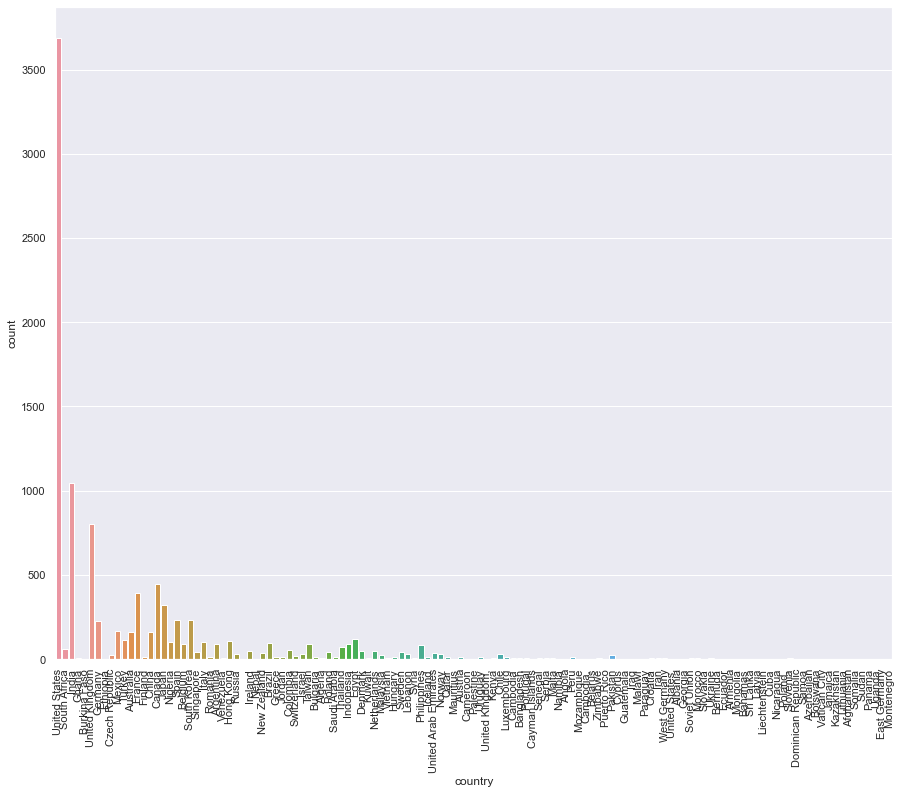

In [149]:
ax = sns.countplot(x='country', data=df_country_final)

ax.tick_params(axis='x', rotation=90)

This simple countplot shows that Netflix is popular only in 5 to 6 countries basically. 

### So, lets look for top 10 countries 

Movies

Creating the frequency dataframe

In [162]:
movies= pd.DataFrame(df_country_final.loc[df_country_final['type'] == 'Movie']['country'].value_counts()).sort_index()
movies.head()

,country
,1
Afghanistan,1
Albania,1
Algeria,3
Angola,1


In [163]:
movies.rename(columns={'country':'freq_m'}, inplace=True)
movies.index.names=['index']
movies['country_m'] = movies.index
movies = movies.sort_values('freq_m', ascending=False).reset_index()
movies

,index,freq_m,country_m
0,United States,2751,United States
1,India,962,India
2,United Kingdom,532,United Kingdom
3,Canada,319,Canada
4,France,303,France
...,...,...,...
117,Nicaragua,1,Nicaragua
118,Palestine,1,Palestine
119,Panama,1,Panama
120,Paraguay,1,Paraguay


TV Shows

In [168]:
shows = pd.DataFrame(df_country_final.loc[df_country_final['type'] == 'TV Show']['country'].value_counts()).sort_index()
shows.head()

,country
,1
Argentina,20
Australia,66
Austria,1
Azerbaijan,1


In [169]:
shows.rename(columns={'country':'freq_T'}, inplace=True)
shows.index.names=['index']
shows['country_T'] = shows.index
shows = shows.sort_values('freq_T', ascending=False).reset_index()
shows

,index,freq_T,country_T
0,United States,938,United States
1,United Kingdom,272,United Kingdom
2,Japan,199,Japan
3,South Korea,170,South Korea
4,Canada,126,Canada
...,...,...,...
61,Switzerland,1,Switzerland
62,Hungary,1,Hungary
63,Malta,1,Malta
64,Senegal,1,Senegal


In [187]:
fig = px.bar(shows.iloc[:10], x = 'country_T', y = 'freq_T',
                labels={
                     "country_T": "Country",
                     "freq_T": "Number of Shows",
                        },
                title="Top 10 TV Shows Creating Countries in Netflix",
                template="plotly_dark")
fig.show()

In [189]:
fig = px.bar(movies.iloc[:10], x = 'country_m', y = 'freq_m',
                labels={
                     "country_m": "Country",
                     "freq_m": "Number of Shows",
                        },
                title="Top 10 Movie Creating Countries in Netflix",
                template="plotly_dark")
fig.show()

In [190]:
country_lst = list(df_country_freq['country'][:10])
freq_lst = list(df_country_freq['freq'][:10])
data = dict(
    frequency = freq_lst,
    country=country_lst)

px.funnel(data, x='frequency', y='country',
            labels={"country": "Country"},
                title="Top 10 Content Creating Countries in Netflix",
                template="ggplot2")


# <b>Content Rating Analysis</b>

In [218]:
df_rating = df_raw[['show_id','type','rating']]
df_rating.head()

,show_id,type,rating
0,s1,Movie,PG-13
1,s2,TV Show,TV-MA
2,s3,TV Show,TV-MA
3,s4,TV Show,TV-MA
4,s5,TV Show,TV-MA


In [219]:
df_rating.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

) and (df_rating.rating == '84 min') and (df_rating.rating == '66 min')

In [220]:
idx = df_rating.index[df_rating.rating == '74 min']
df_rating.drop(idx,axis=0, inplace=True)
idx = df_rating.index[df_rating.rating == '84 min']
df_rating.drop(idx,axis=0, inplace=True)
idx = df_rating.index[df_rating.rating == '66 min']
df_rating.drop(idx,axis=0, inplace=True)

c:\Users\writa\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [222]:
df_rating = df_rating.dropna()

In [223]:
df_rating.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [239]:
fig = px.histogram(df_rating, x = 'rating', color='type')

fig.update_traces(opacity=0.65)
fig.update_layout(title='Content Ratings',
                    barmode='overlay',template='plotly_dark',width=1150, height=600)
fig.show()

# Content Release Rate

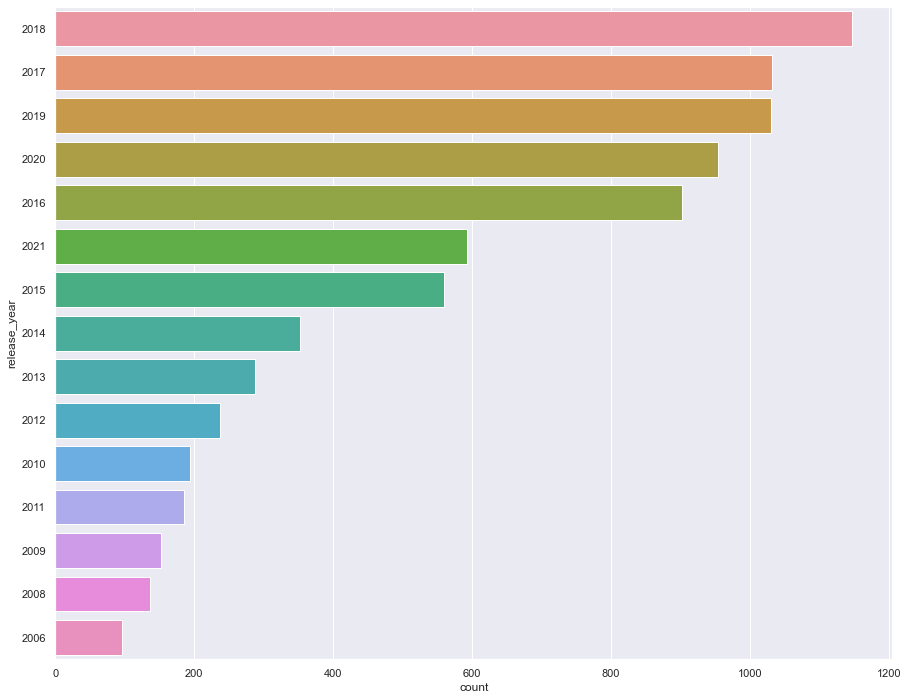

In [243]:
#plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=df_raw, order=df_raw['release_year'].value_counts().index[0:15])

In last 1 or 1 and a half decade, it's basically 2018 when, most contents were released. 2020 statistics is understandable though.That's basically COVID effect.

### Now, let's jump into a more detailed analysis like when in a year, most amount of movies get released usually

In [254]:
df_date = df_raw[['date_added']].dropna()
df_date['year'] = df_date['date_added'].apply(lambda x : x.split(', ')[-1])
df_date['month'] = df_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])
df_date

,date_added,year,month
0,"September 25, 2021",2021,September
1,"September 24, 2021",2021,September
2,"September 24, 2021",2021,September
3,"September 24, 2021",2021,September
4,"September 24, 2021",2021,September
...,...,...,...
8802,"November 20, 2019",2019,November
8803,"July 1, 2019",2019,July
8804,"November 1, 2019",2019,November
8805,"January 11, 2020",2020,January


In [255]:
df_date_new = df_date.groupby('year')['month'].value_counts()
df_date_new

year  month   
2008  February      1
      January       1
2009  May           1
      November      1
2010  November      1
                 ... 
2021  August      178
      January     132
      May         132
      March       112
      February    109
Name: month, Length: 108, dtype: int64

Now ,if we unstack it, we will get the counts for every months in every single year. Thus we get the required format.

In [257]:
df_date_final = df_date_new.unstack()
df_date_final

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
2008,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,11.0,1.0
2012,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2013,NaN,1.0,2.0,NaN,NaN,NaN,NaN,1.0,NaN,2.0,3.0,2.0
2014,2.0,1.0,6.0,2.0,2.0,1.0,1.0,NaN,NaN,4.0,4.0,1.0
2015,5.0,2.0,21.0,4.0,1.0,7.0,6.0,5.0,6.0,4.0,14.0,7.0
2016,22.0,34.0,96.0,15.0,43.0,28.0,18.0,17.0,13.0,44.0,51.0,48.0


In [261]:
df_date_final.fillna(method='bfill',axis=1,inplace=True)
df_date_final.fillna(method='ffill',axis=1,inplace=True)

In [262]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df_date_final = df_date_final[month_order].T
df_date_final

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,,,,,
December,1.0,1.0,1.0,1.0,1.0,2.0,6.0,21.0,96.0,118.0,185.0,215.0,169.0,109.0
November,1.0,1.0,1.0,11.0,1.0,2.0,4.0,4.0,44.0,85.0,154.0,255.0,154.0,183.0
October,1.0,1.0,1.0,11.0,1.0,3.0,4.0,14.0,51.0,126.0,191.0,193.0,167.0,183.0
September,1.0,1.0,1.0,1.0,1.0,2.0,1.0,7.0,48.0,113.0,124.0,123.0,168.0,183.0
August,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,34.0,115.0,164.0,131.0,129.0,178.0
July,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7.0,28.0,79.0,152.0,157.0,146.0,257.0
June,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6.0,18.0,94.0,78.0,168.0,156.0,207.0
May,1.0,1.0,1.0,1.0,1.0,2.0,4.0,6.0,13.0,86.0,97.0,139.0,157.0,132.0
April,1.0,1.0,1.0,1.0,1.0,1.0,2.0,5.0,22.0,93.0,115.0,162.0,177.0,188.0


Text(0.3, 1.0, 'Netflix Release Rate ( Monthwise )')

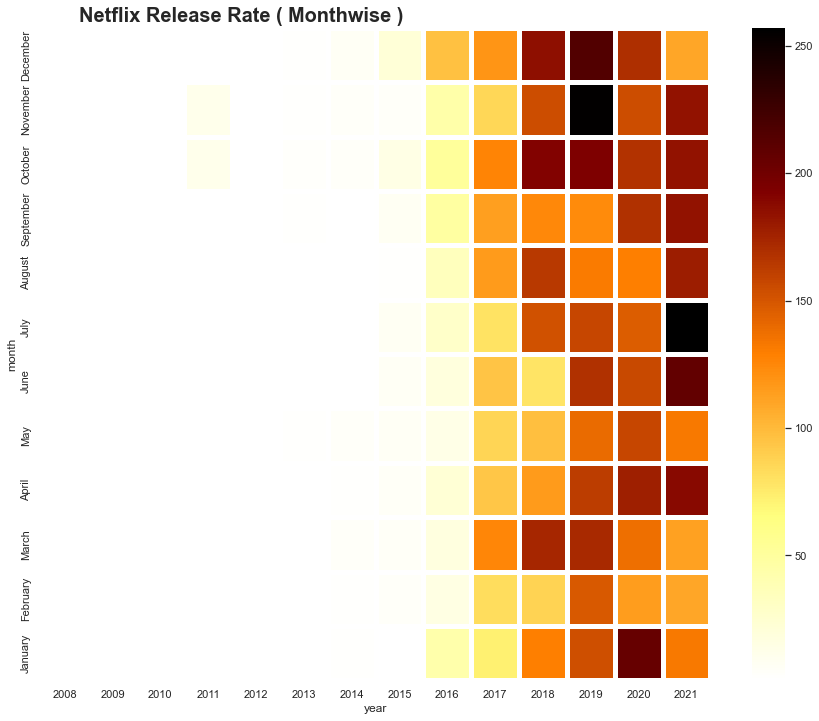

In [279]:
ax = sns.heatmap(df_date_final, annot=False, cmap='afmhot_r',edgecolor='white',linewidths=5)
plt.title('Netflix Release Rate ( Monthwise )', fontsize=20, fontweight='bold', position=(0.30, 1.0+0.02))

# Duration Analysis

In [296]:
df_duration_m = df_raw[df_raw['type'] == 'Movie'][['show_id','duration']]
df_duration_T = df_raw[df_raw['type'] == 'TV Show'][['show_id','duration']]

### For Movies

In [299]:
df_duration_m = df_duration_m.dropna()
df_duration_m['duration'] = df_duration_m['duration'].apply(lambda x : str(x).split(' ')[0])
df_duration_m['duration'] = df_duration_m['duration'].astype(int)
df_duration_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6128 entries, 0 to 8806
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   show_id   6128 non-null   object
 1   duration  6128 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 119.7+ KB


[Text(0.5, 1.0, 'Probability Density of Duration Distribution')]

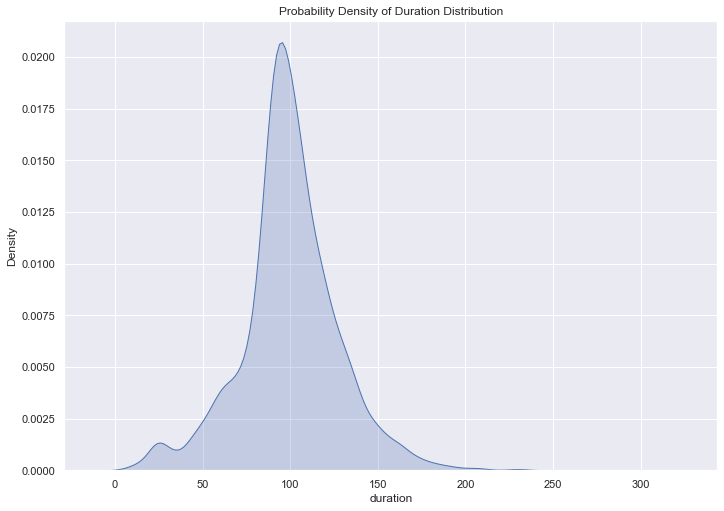

In [306]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="darkgrid")
ax = sns.kdeplot(data=df_duration_m, x='duration', shade=True)
ax.set(title='Probability Density of Duration Distribution')

So, a good amount of movies on Netflix are among the duration of 75 to 125 minutes. As it is expected that a fair amount of audience can not afford 3 hours to watch a movie in today's life style.

### For TV Shows 

In [308]:
df_duration_T.duration.isnull().sum()

0

So, no null value problems.

In [312]:
df_duration_T['duration'] = df_duration_T['duration'].apply(lambda x : str(x).split(' ')[0])
df_duration_T['duration'] = df_duration_T['duration'].astype(int)
df_duration_T.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2676 entries, 1 to 8803
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   show_id   2676 non-null   object
 1   duration  2676 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 52.3+ KB


<AxesSubplot:xlabel='duration', ylabel='count'>

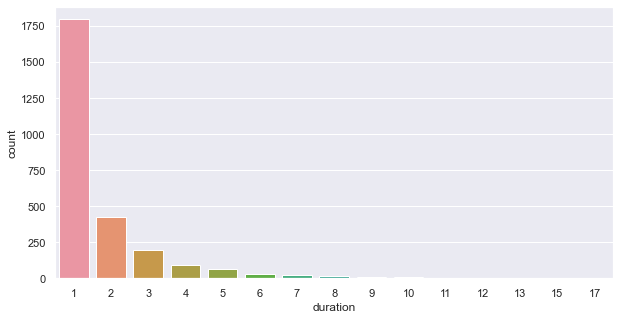

In [374]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x='duration', data=df_duration_T)

So, its clearly seen that TV Shows with single season got released more and more. A lots of popular TV Shows may be of 9 or 10 seasons but surprisingly they are just a very small part of the whole contents that get released.

# <b> IMDB RATING ANALYSIS

dataset link : https://datasets.imdbws.com/

In [318]:
df_imdb_rating = pd.read_table('title_rating.tsv')
df_imdb_title = pd.read_table('title_basics.tsv')

c:\Users\writa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning:

Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.



In [319]:
df_imdb_rating.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1899
1,tt0000002,5.9,254
2,tt0000003,6.5,1692
3,tt0000004,5.7,166
4,tt0000005,6.2,2509


In [320]:
df_imdb_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1248718 entries, 0 to 1248717
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1248718 non-null  object 
 1   averageRating  1248718 non-null  float64
 2   numVotes       1248718 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 28.6+ MB


In [323]:
df_imdb_title.sample(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
7988259,tt7523880,tvEpisode,Episode #1.151,Episode #1.151,0,1991,\N,\N,"Drama,Romance"
7006522,tt5333754,tvEpisode,Garden in the Sea,Garden in the Sea,0,1955,\N,\N,Drama
2859843,tt13442378,tvEpisode,Episode dated 15 September 1985,Episode dated 15 September 1985,0,1985,\N,\N,"Music,Talk-Show"
6127509,tt3339206,tvEpisode,Episode dated 12 November 2013,Episode dated 12 November 2013,0,2013,\N,\N,"Comedy,Music,Talk-Show"
5006865,tt1926329,short,Sunproof,Sunproof,0,1998,\N,\N,Short
6642362,tt4508434,tvEpisode,Episode #7.43,Episode #7.43,0,1997,\N,\N,"Drama,Family"
399937,tt0417085,tvEpisode,'Dodgeball: A True Underdog Story','Dodgeball: A True Underdog Story',0,2004,\N,\N,Comedy
4964932,tt1901451,tvEpisode,Carolina Herrera,Carolina Herrera,0,2004,\N,\N,Talk-Show
2310042,tt12414486,tvEpisode,Episode #15.101,Episode #15.101,0,\N,\N,\N,"Comedy,Crime,Drama"
1638521,tt11201206,tvEpisode,Ein humorvoller Flirt,Ein humorvoller Flirt,0,2019,\N,\N,Drama


In [322]:
df_imdb_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9089445 entries, 0 to 9089444
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 624.1+ MB


In [325]:
df_imdb = df_imdb_rating[['tconst','averageRating']].merge(df_imdb_title[['tconst','primaryTitle']], on='tconst', how='left')

In [326]:
df_imdb.sample(10)

,tconst,averageRating,primaryTitle
693443,tt15289702,6.2,Coeurs vaillants
868235,tt2529196,8.7,Coming Home
976571,tt4196944,6.2,Movie Science: Interstellar
983805,tt4320546,8.0,Zieh's Dir rein und weine
532317,tt11610378,7.1,Mannen som falt
119269,tt0178306,6.2,El casamiento de Laucha
576847,tt1256225,7.3,The Last War
687188,tt1513062,6.7,Zap Jr. High
247342,tt0459150,7.8,The Legend of the Blue Puppy
423379,tt0899243,8.2,El gusano


Now, we can safely remove the 'tconst' column.

In [327]:
df_imdb.drop('tconst', axis=1, inplace=True)
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1248718 entries, 0 to 1248717
Data columns (total 2 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   averageRating  1248718 non-null  float64
 1   primaryTitle   1248718 non-null  object 
dtypes: float64(1), object(1)
memory usage: 28.6+ MB


Let's save this imdb rating dataset as a csv file, as the original datasets are of heavy size so it could be problem to upload and all.

In [328]:
#df_imdb.to_csv('imdb_rating.csv')

Now, let's merge this dataset with our previous dataset df_raw

In [329]:
df_raw_rating = df_raw.merge(df_imdb, left_on='title', right_on='primaryTitle',how='left')

In [331]:
df_raw_rating.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,averageRating,primaryTitle
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",7.4,Dick Johnson Is Dead
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",7.9,Blood & Water
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",7.3,Blood & Water
3,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",7.3,Blood & Water
4,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",6.6,Blood & Water


Let's save this dataset also

In [332]:
#df_raw_rating.to_csv('Netflix_IMDBrating.csv')

In [335]:
genre_data = df_raw[['show_id','title','type','country', 'release_year', 'duration']]
genre_final = genre_data[['show_id','title']].merge(df_genre_final, on='show_id',how='left')

In [337]:
genre_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13823 entries, 0 to 13822
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       13823 non-null  object 
 1   title         13823 non-null  object 
 2   genre         13744 non-null  object 
 3   type          13744 non-null  object 
 4   country       12558 non-null  object 
 5   release_year  13744 non-null  float64
 6   duration      13744 non-null  object 
dtypes: float64(1), object(6)
memory usage: 863.9+ KB


In [351]:
movie_rating = genre_final.merge(df_raw_rating[['show_id','director','cast','averageRating']], on='show_id', how='left')

In [352]:
movie_rating.head()

,show_id,title,genre,type,country,release_year,duration,director,cast,averageRating
0,s1,Dick Johnson Is Dead,Documentaries,Movie,United States,2020.0,90 min,Kirsten Johnson,NaN,7.4
1,s2,Blood & Water,Dramas,TV Show,South Africa,2021.0,2 Seasons,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",7.9
2,s2,Blood & Water,Dramas,TV Show,South Africa,2021.0,2 Seasons,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",7.3
3,s2,Blood & Water,Dramas,TV Show,South Africa,2021.0,2 Seasons,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",7.3
4,s2,Blood & Water,Dramas,TV Show,South Africa,2021.0,2 Seasons,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",6.6


Lets analyse the genre wise rating

In [349]:
movie_rating_avg = pd.DataFrame(movie_rating.groupby(['title'])['averageRating'].mean()).reset_index()

In [350]:
movie_rating_avg

,title,averageRating
0,#Alive,6.3
1,#AnneFrank - Parallel Stories,NaN
2,#FriendButMarried,NaN
3,#FriendButMarried 2,6.9
4,#Roxy,5.1
...,...,...
8802,忍者ハットリくん,NaN
8803,海的儿子,NaN
8804,마녀사냥,NaN
8805,반드시 잡는다,NaN


In [359]:
genre_data = df_genre_final[['show_id','genre']].merge(df_raw[['show_id','title']], on='show_id', how='left')
genre_rating = genre_data.merge(movie_rating_avg, on='title', how='left')

In [360]:
genre_rating.sample(10)

,show_id,genre,title,averageRating
4253,s2669,Dramas,Earth and Blood,5.200000
13634,s8741,Documentaries,Wild Alaska,7.500000
8659,s5523,Dramas,Sand Castle,7.833333
6894,s4369,Sci-Fi,Mystery Science Theater 3000: The Return,NaN
8439,s5375,Romantic,Amar,5.740000
5245,s3285,Romantic,Westside Story,NaN
12012,s7716,Romantic,Patron Mutlu Son Istiyor,NaN
5498,s3454,Action,Raising Dion,7.650000
12298,s7904,Comedies,Runaway Bride,6.525000
1030,s621,Reality,Droppin' Cash: Los Angeles,3.400000


In [361]:
genre_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13744 entries, 0 to 13743
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   show_id        13744 non-null  object 
 1   genre          13744 non-null  object 
 2   title          13744 non-null  object 
 3   averageRating  11124 non-null  float64
dtypes: float64(1), object(3)
memory usage: 536.9+ KB


In [362]:
genre_rating = genre_rating.dropna()
genre_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11124 entries, 0 to 13743
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   show_id        11124 non-null  object 
 1   genre          11124 non-null  object 
 2   title          11124 non-null  object 
 3   averageRating  11124 non-null  float64
dtypes: float64(1), object(3)
memory usage: 434.5+ KB


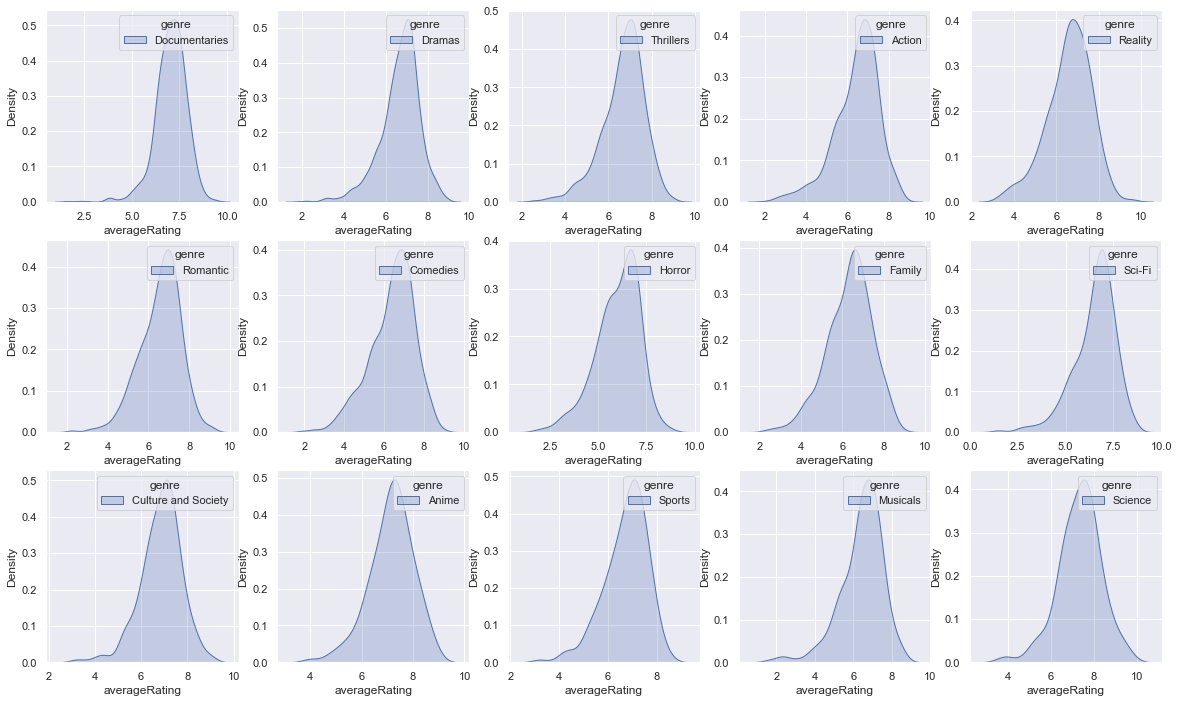

In [384]:
fig,axes = plt.subplots(3,5)
fig.set_size_inches(20, 12)

genre_lst = list(genre_rating['genre'].unique())
for item,ax in zip(genre_lst,axes.flatten()) :    
    genre_drama = genre_rating[(genre_rating['genre'] == item)]
    sns.kdeplot(data = genre_drama, x='averageRating', hue='genre', shade=True, ax=ax)

